In [257]:
import matplotlib.pyplot as plt
# Create labels for the x-axis (temperature ranges)
import pandas as pd
import numpy as np
from Helper_fun import generate_temp_range

In [258]:
t_deltas = np.array([5])
agg_fact_list=np.array([1,2,3,5,10])
min_temp_array, max_temp_array = generate_temp_range(t_deltas)

Convert from csv to parquet if needed

In [259]:
def csv_to_parq(fp):
    pd.read_csv(fp).to_parquet(fp.replace('.csv', '.parquet'))

In [260]:

# for i in range(len(min_temp_array)):
#     for j in range(len(agg_fact_list)):
#         agg_fact=agg_fact_list[j]
#         min_temp=min_temp_array[i]
#         max_temp=max_temp_array[i]
#         csv_to_parq(f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_{agg_fact}_tracknumber.csv")

Load data

In [261]:
fp=f"/cluster/work/climate/dnikolo/Cloud_analysis/T_30_25_agg_3_tracknumber"
pd.read_parquet(fp+".parquet")

,is_liq,is_mix,is_ice,max_water_frac,max_ice_fraction,avg_size[km],max_size[km],min_size[km],max_size[px],min_size[px],track_start_time,track_length,glaciation_start_time,glaciation_end_time,avg_lat,avg_lon,start_ice_fraction,end_ice_fraction
0,True,True,False,1.000000,0.287171,1.188563e+05,2.100403e+05,40379.749073,2956,635,2004-02-01 14:15:00,0 days 05:45:00,None,None,-73.883502,19.443657,"[0.007059800664451776, 0.01833872707659112, 0....","[0.24688995215311005, 0.0771653543307087, 0.17..."
1,True,False,False,1.000000,0.063676,1.181369e+04,2.668444e+04,1194.726093,1162,48,2004-02-01 14:15:00,0 days 04:15:00,None,None,-84.596130,-13.442830,"[0.03947368421052633, 0.013769363166953541, 0....","[0.0, 0.0, 0.0, 0.0]"
2,True,True,False,0.970775,0.598246,4.289477e+04,6.070445e+04,20073.512419,924,322,2004-02-01 14:15:00,0 days 05:45:00,None,None,-75.390716,45.732830,"[0.029224904701397714, 0.07535885167464118, 0....","[0.4795417348608838, 0.5281456953642384, 0.598..."
3,True,True,False,0.995037,0.522496,1.882663e+04,2.227382e+04,12755.670738,742,384,2004-02-01 14:15:00,0 days 05:45:00,None,None,-83.076907,-26.481331,"[0.47405329593267886, 0.4984756097560976, 0.46...","[0.0234375, 0.019093078758949833, 0.0187353629..."
4,True,True,False,1.000000,0.149912,3.393311e+04,5.374385e+04,17564.779334,656,221,2004-02-01 14:15:00,0 days 05:45:00,None,None,71.589661,-39.866111,"[0.07164634146341464, 0.052252252252252274, 0....","[0.017587939698492483, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,True,True,False,1.000000,0.533333,1.415755e+03,1.765580e+03,1064.499571,15,9,2004-02-01 19:15:00,0 days 00:45:00,None,None,-62.594410,-38.358897,"[0.0, 0.11111111111111116, 0.5333333333333333,...","[0.0, 0.11111111111111116, 0.5333333333333333,..."
494,True,False,False,1.000000,0.000000,2.095027e+03,2.764571e+03,1036.714270,32,12,2004-02-01 19:15:00,0 days 00:45:00,None,None,-70.304620,-60.300569,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
495,True,False,False,1.000000,0.000000,1.233415e+03,1.446841e+03,1070.637140,16,12,2004-02-01 19:15:00,0 days 00:45:00,None,None,69.523998,-54.860187,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
496,True,False,False,1.000000,0.000000,2.723251e+03,3.704846e+03,1001.207286,26,7,2004-02-01 19:15:00,0 days 00:45:00,None,None,56.445464,-36.305243,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


In [262]:
def Extract_array_from_df(series:pd.Series):
    return np.stack(series.values)

In [263]:
cloud_properties_df_list=[]
for i in range(len(min_temp_array)):
    cloud_properties_df_list.append([])
    for j in range(len(agg_fact_list)):
        agg_fact=agg_fact_list[j]
        min_temp=min_temp_array[i]
        max_temp=max_temp_array[i]
        fp=f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_{agg_fact}_tracknumber"
        if agg_fact > 1:
            cloud_properties_df_list[i].append(pd.read_parquet(fp+".parquet"))
        elif agg_fact == 1:
            cloud_properties_df_list[i].append(pd.read_csv(fp+".csv"))
        else:
            print(f"Invalid aggreation factor {agg_fact}")
        

In [264]:
glaciation_counter_agg=0
cloud_count=np.empty((len(agg_fact_list),len(min_temp_array)))
glaciation_counter_agg=np.zeros(len(agg_fact_list))
for i in range(len(min_temp_array)):
    for j in range(len(agg_fact_list)):
        agg_fact=agg_fact_list[j]
        min_temp=min_temp_array[i]
        max_temp=max_temp_array[i]
        df=cloud_properties_df_list[i][j]
        total=df['is_liq']+df['is_mix']+df['is_ice']
        total=df['is_liq'].size
        glaciation_counter_agg[j]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
        cloud_count[j,i]=total
        

In [265]:
glaciation_counter_temp_agg_1=np.zeros(len(min_temp_array))
for i in range(len(min_temp_array)):
    agg_fact=agg_fact_list[j]
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=cloud_properties_df_list[i][np.where(agg_fact_list==1)[0][0]]
    glaciation_counter_temp_agg_1[i]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)


array([ 0.,  7., 51., 29., 39., 44., 98.])

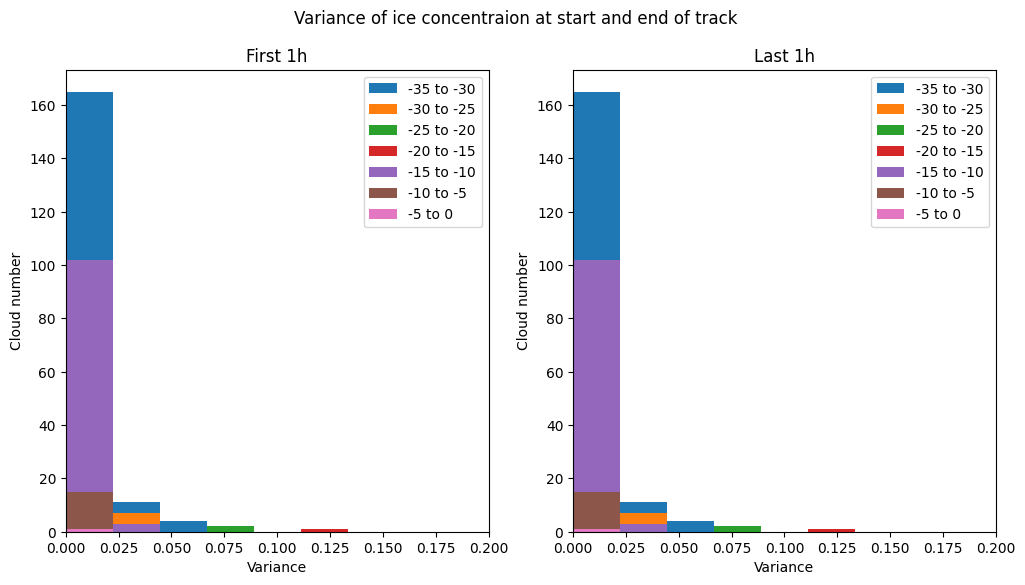

In [266]:
from datetime import timedelta
start_ice_content_list=[]
higher_final_IF_counter_temp=np.empty(len(min_temp_array))
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range( len(min_temp_array))]
# Create a figure and two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for i in range(len(min_temp_array)-1,-1,-1):
    agg_fact=agg_fact_list[j]
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=cloud_properties_df_list[i][np.where(agg_fact_list==3)[0][0]]
    # print(df["track_length"]>)
    start_ice_content = Extract_array_from_df(df["start_ice_fraction"][(df["max_ice_fraction"]>0.05) & (df["track_length"]>timedelta(minutes=60))])
    end_ice_content = Extract_array_from_df(df["end_ice_fraction"][(df["max_ice_fraction"]>0.05) & (df["track_length"]>timedelta(minutes=60))])
    higher_final_IF_counter_temp[i]=(start_ice_content.mean(axis=1)<end_ice_content.mean(axis=1)).sum()
    bins=np.linspace(0,0.2,10)
    ax1.hist(np.var(start_ice_content,axis=1),bins=bins,label=labels[i])
    ax2.hist(np.var(start_ice_content,axis=1),bins=bins,label=labels[i])
ax1.set_xlim(0,0.2)
ax2.set_xlim(0,0.2)
ax1.set_title("First 1h")
ax2.set_title("Last 1h")
ax1.set_xlabel("Variance")
ax2.set_xlabel("Variance")
ax1.set_ylabel("Cloud number")
ax2.set_ylabel("Cloud number")
fig.suptitle("Variance of ice concentraion at start and end of track")
ax1.legend()
ax2.legend()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/ice_content_variance_hist.png', dpi=400)
higher_final_IF_counter_temp

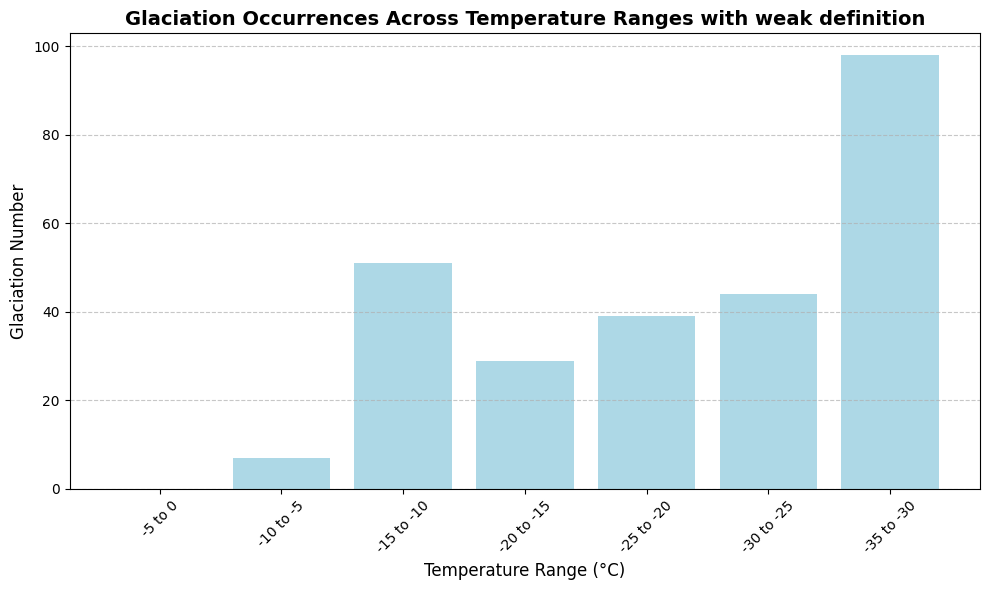

In [267]:
# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range( len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, higher_final_IF_counter_temp, color='lightblue', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges with weak definition', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_weak_def.png', dpi=400)
plt.show()

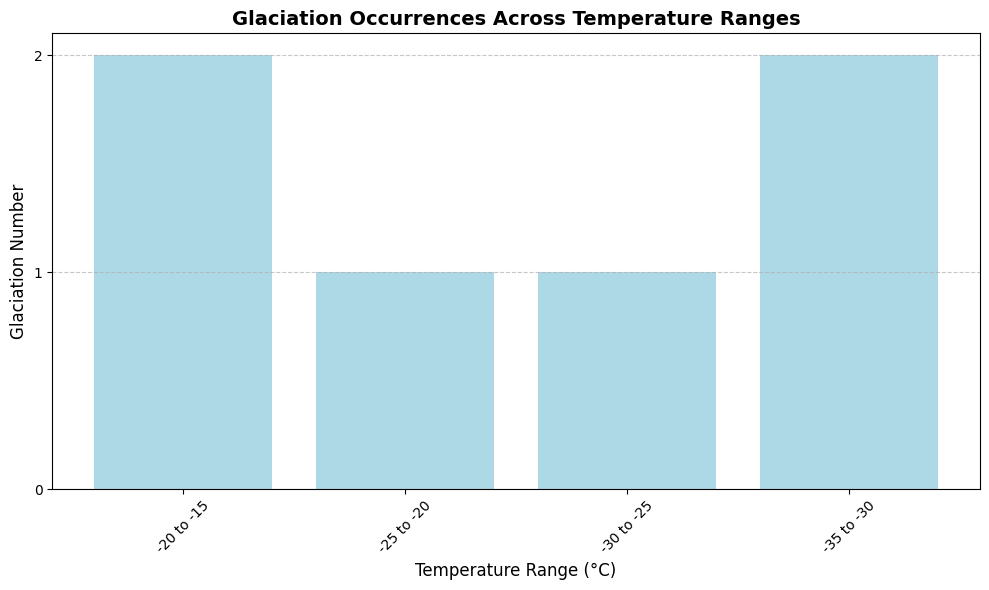

In [268]:

# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(3, len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, glaciation_counter_temp_agg_1[3:], color='lightblue', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_1.png', dpi=400)
plt.show()

In [269]:
tmp_bin_array=np.arange(-80,81,10)
# tmp_bin_array

In [270]:
glaciation_counter_temp_agg_3=np.zeros(len(min_temp_array))
tmp_bins=pd.IntervalIndex.from_arrays(tmp_bin_array[0:-1],tmp_bin_array[1:])
latitude_counts= pd.DataFrame(np.zeros(len(tmp_bin_array)-1), index=tmp_bins,columns=["n_clouds"])
for i in range(len(min_temp_array)):
    agg_fact=agg_fact_list[j]
    min_temp=min_temp_array[i]
    max_temp=max_temp_array[i]
    df=cloud_properties_df_list[i][np.where(agg_fact_list==3)[0][0]]
    # df=pd.read_csv(f"/cluster/work/climate/dnikolo/Cloud_analysis/T_{abs(round(min_temp))}_{abs(round(max_temp))}_agg_3_tracknumber.csv")
    glaciation_counter_temp_agg_3[i]+=(df['is_liq']& df['is_mix'] & df['is_ice']).astype(bool).sum(axis=0)
    latitude_counts["n_clouds"]+=pd.cut(df[df["max_ice_fraction"]>0]['avg_lat'].dropna(), tmp_bin_array).value_counts()


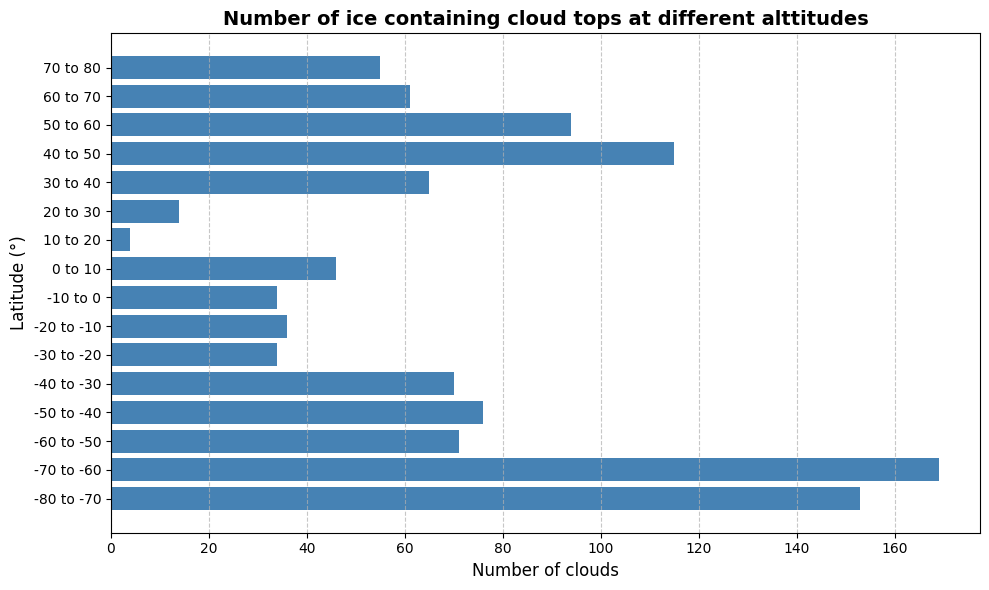

In [271]:


# Create labels for the y-axis (temperature ranges)
labels = [f"{tmp_bin_array[i]} to {tmp_bin_array[i+1]}" for i in range(len(tmp_bin_array)-1)]

# Create the horizontal bar graph
plt.figure(figsize=(10, 6))

# Add gridlines for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create horizontal bars using plt.barh() instead of plt.bar()
plt.barh(labels, latitude_counts["n_clouds"], color='#4682B4', label="N glaciations")

# Add title and labels
plt.title('Number of ice containing cloud tops at different alttitudes', fontsize=14, fontweight='bold')
plt.xlabel('Number of clouds', fontsize=12)
plt.ylabel('Latitude (°)', fontsize=12)

# Format x-axis to show only integer values
plt.gca().xaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
# plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_3x3.png', dpi=400)
plt.show()

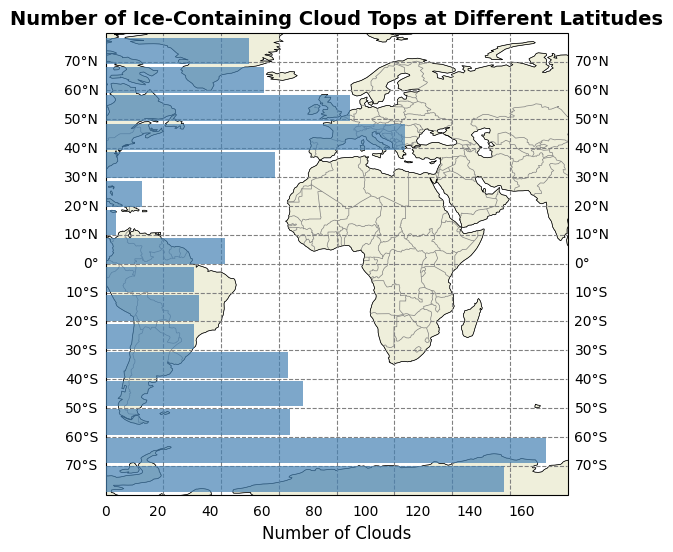

In [272]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Dummy data for illustration
# tmp_bin_array = [-80, -60, -40, -20, 0, 20, 40, 60, 80]
# latitude_counts = {"n_clouds": [5, 15, 20, 10, 25, 15, 10, 5]}

# Calculate midpoints and bin widths
latitudes = [(tmp_bin_array[i] + tmp_bin_array[i + 1] -1 ) / 2 for i in range(len(tmp_bin_array) - 1)]
bin_widths = [tmp_bin_array[i + 1] - tmp_bin_array[i] - 1 for i in range(len(tmp_bin_array) - 1)]

# Create the figure and map axes
fig = plt.figure(figsize=(10, 6))
ax_map = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_map.set_extent([-80, 80, -80, 80], crs=ccrs.PlateCarree())
ax_map.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)
ax_map.add_feature(cfeature.BORDERS, edgecolor='gray', linewidth=0.5)
ax_map.add_feature(cfeature.LAND, facecolor='lightgray')
ax_map.add_feature(cfeature.LAND, edgecolor='black', linewidth=0.2)
#n_steps=10,
# Add gridlines with specified latitude lines
gl = ax_map.gridlines(
    
    draw_labels=True,
    color='gray',
    linestyle='--',
    linewidth=0.8
)
gl.top_labels = False  # Disable labels on the top
gl.bottom_labels = False  # Disable labels on the bottom
# gl.right_labels = False  # Disable labels on the right

# Add specific latitudes for gridlines (including top and bottom latitudes)
latitudes_to_show = tmp_bin_array  # Include all latitude bin boundaries
gl.ylocator = plt.FixedLocator(latitudes_to_show)

# Create the second Axes for the bar chart, sharing the same extent
ax_bar = fig.add_axes(ax_map.get_position(), zorder=2)  # Align with the map
ax_bar.barh(latitudes, latitude_counts["n_clouds"], color='#4682B4',
            height=bin_widths, zorder=3, alpha=0.7)  # Use `height` for correct bin widths

# Remove the background of the bar chart (make transparent)
ax_bar.set_facecolor((1, 1, 1, 0))  # RGBA: white background, fully transparent

# Add title and labels for the bar chart
ax_bar.set_title('Number of Ice-Containing Cloud Tops at Different Latitudes', fontsize=14, fontweight='bold')
ax_bar.set_xlabel('Number of Clouds', fontsize=12)

# Remove the bar graph's y-axis labels
ax_bar.set_yticks([])  # Removes tick marks and labels on y-axis

# Set continuous latitude range for y-axis
ax_bar.set_ylim(tmp_bin_array[0] - 1, tmp_bin_array[-1] + 1)  # Full range of latitude bins

# Format x-axis to show only integer values
ax_bar.xaxis.get_major_locator().set_params(integer=True)

# Hide axes ticks and spines for the bar chart (optional for cleaner overlay)
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_visible(False)
ax_bar.spines['bottom'].set_visible(False)
ax_bar.tick_params(left=False, bottom=False)

# Save and show the plot
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/N_ice_conaining_clouds_by_lat.png', dpi=400)
plt.show()



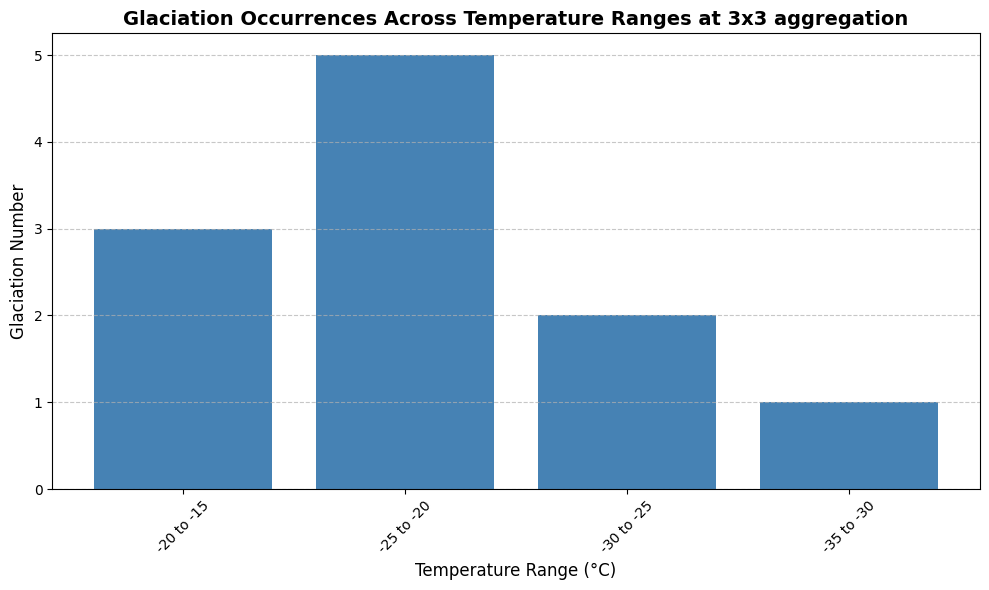

In [273]:
# Create labels for the x-axis (temperature ranges)
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(3, len(min_temp_array))]

# Create the bar graph
plt.figure(figsize=(10, 6))
# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.bar(labels, glaciation_counter_temp_agg_3[3:], color='#4682B4', label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurrences Across Temperature Ranges at 3x3 aggregation', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Glaciation Number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Format y-axis to show only integer values
plt.gca().yaxis.get_major_locator().set_params(integer=True)

# Show the plot
plt.tight_layout()
plt.savefig('/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_temp_3x3.png', dpi=400)
plt.show()

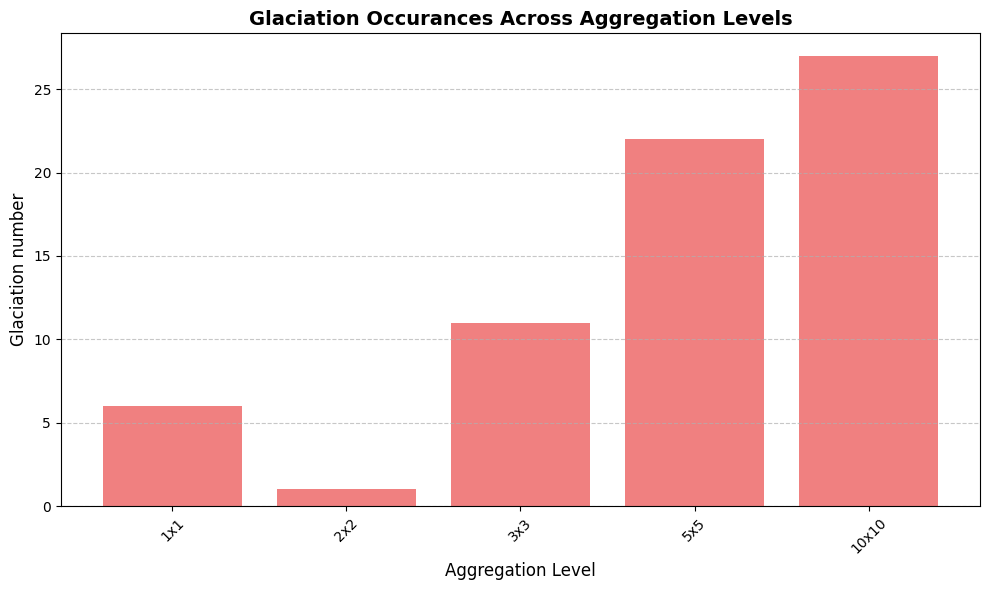

In [274]:
# # Create labels for the x-axis (temperature ranges)


labels = [f"{agg_fact_list[i]}x{agg_fact_list[i]}" for i in range(len(agg_fact_list))]

# # Create the bar graph
plt.figure(figsize=(10,6))
# plt.bar(labels, n_track_arr[np.where(max_temp_array-min_temp_array==5)], color='skyblue',label="N tracks")
plt.bar(labels, glaciation_counter_agg, color='lightcoral',label="N glaciations")

# Add title and labels
plt.title('Glaciation Occurances Across Aggregation Levels', fontsize=14, fontweight='bold')
plt.xlabel('Aggregation Level', fontsize=12)
plt.ylabel('Glaciation number', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
# # Show the plot
plt.tight_layout()
plt.savefig(f'/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/glaciation_counter_agg.png',dpi=400)
plt.show()

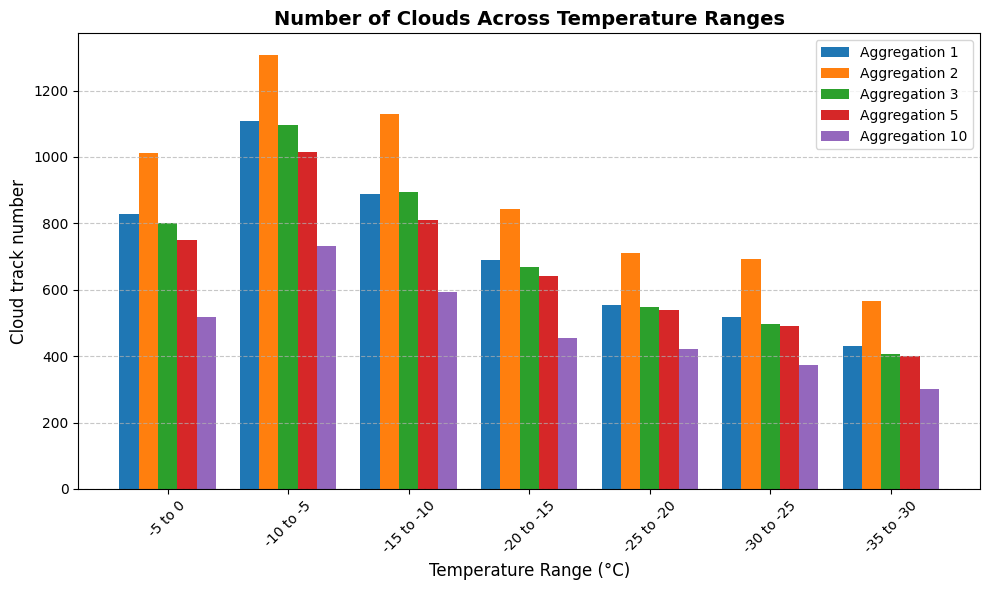

In [275]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]
# Set up figure
plt.figure(figsize=(10,6))

# Define bar width and offsets
bar_width = 0.8/len(agg_fact_list)
x = np.arange(len(labels))

# Plot each bar set with an offset
for j in range(len(agg_fact_list)):
    plt.bar(x + j * bar_width, cloud_count[j, :], width=bar_width, label=f"Aggregation {agg_fact_list[j]}")

# Set x-axis labels
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45)

# Add title, labels, and grid
plt.title('Number of Clouds Across Temperature Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Temperature Range (°C)', fontsize=12)
plt.ylabel('Cloud track number', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("/cluster/work/climate/dnikolo/n2o/Glaciation_time_estimatior/Result_graphs/WG_agg_n_clouds_original_included_11_11_tracknumber.png",dpi=400)
plt.show()


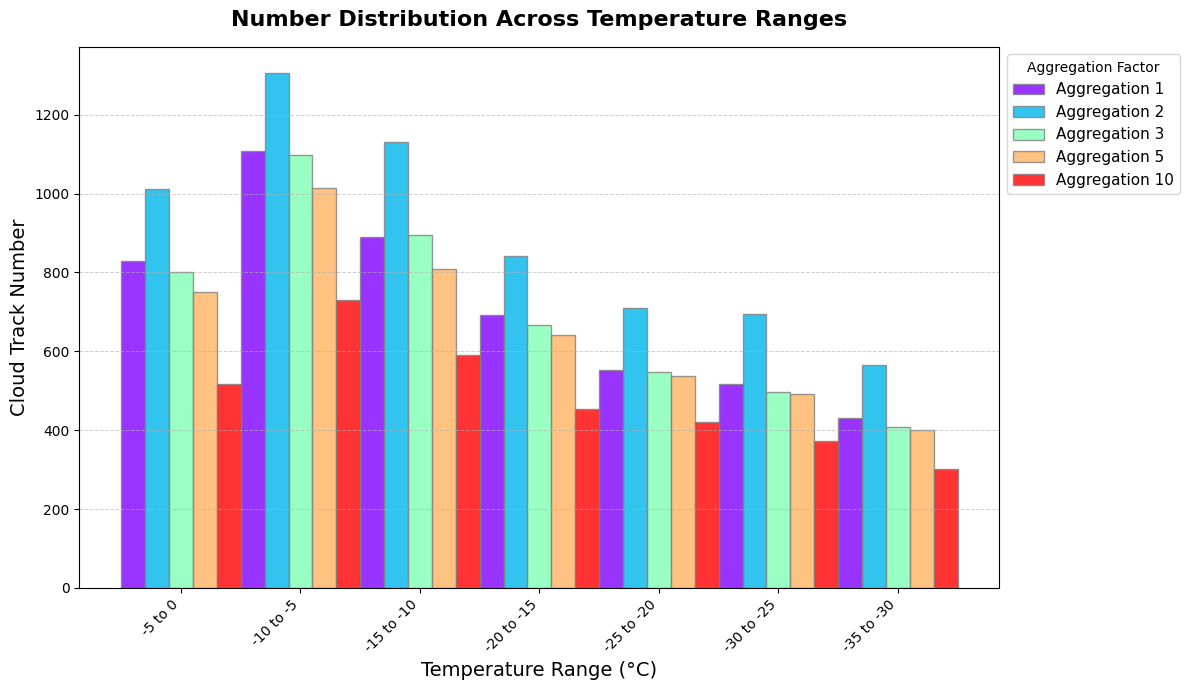

In [276]:
# Generate labels
labels = [f"{min_temp_array[i]} to {max_temp_array[i]}" for i in range(len(min_temp_array))]

# Set up figure
plt.figure(figsize=(12, 7))

# Define bar width and offsets
bar_width = 0.2
x = np.arange(len(labels))

# Define a rainbow color scheme
colors = plt.cm.rainbow(np.linspace(0, 1, len(agg_fact_list)))

# Plot each bar set with an offset and rainbow color scheme
for j in range(len(agg_fact_list)):
    plt.bar(
        x + j * bar_width, 
        cloud_count[j, :], 
        width=bar_width, 
        color=colors[j], 
        alpha=0.8, 
        edgecolor='grey', 
        label=f"Aggregation {agg_fact_list[j]}"
    )

# Set x-axis labels and align them in the center
plt.xticks(x + (len(agg_fact_list) - 1) * bar_width / 2, labels, rotation=45, ha='right')

# Add title, labels, and a light grid
plt.title('Number Distribution Across Temperature Ranges', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Temperature Range (°C)', fontsize=14)
plt.ylabel('Cloud Track Number', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Move legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Aggregation Factor", fontsize=11)

# Adjust layout and show plot
plt.tight_layout()
plt.show()